In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [49]:
x,y = make_moons(n_samples=10000,noise=0.07)

In [51]:
df = {"x1":x[:,0], "x2":x[:,1], "y":y}

In [53]:
data = pd.DataFrame(df)

In [55]:
data

,x1,x2,y
0,0.961754,0.162622,0
1,0.149236,-0.004271,1
2,-0.113892,0.986453,0
3,-0.949877,0.158008,0
4,0.840850,-0.468043,1
...,...,...,...
9995,-0.882525,0.441016,0
9996,1.266264,-0.480106,1
9997,0.534465,0.888328,0
9998,-0.149146,1.062469,0


<Axes: xlabel='x1', ylabel='x2'>

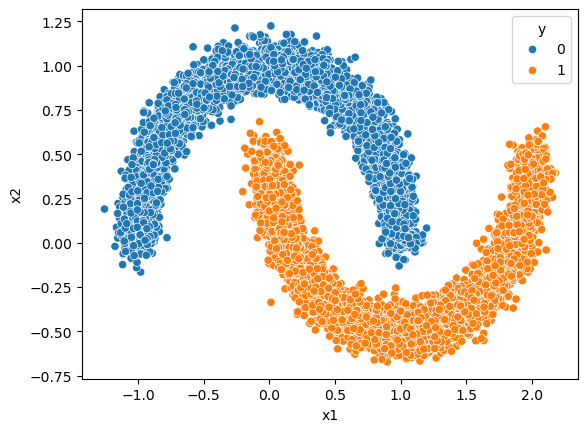

In [57]:
sns.scatterplot(x="x1", y="x2", data=data, hue="y")

In [61]:
x_a = data.iloc[:,:-1]
y_a = data["y"]

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

# Voting Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100 , dt.score(x_test, y_test)*100

(100.0, 100.0)

In [81]:
dt1 = SVC()
dt1.fit(x_train, y_train)
dt1.score(x_train, y_train)*100 , dt1.score(x_test, y_test)*100

(100.0, 100.0)

In [83]:
dt2 = GaussianNB()
dt2.fit(x_train, y_train)
dt2.score(x_train, y_train)*100 , dt2.score(x_test, y_test)*100

(88.1625, 88.55)

In [85]:
from sklearn.ensemble import VotingClassifier

In [93]:
li = [("dt", DecisionTreeClassifier()),("dt1",SVC()),("dt2",GaussianNB())]

In [97]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('dt1', SVC()),
                             ('dt2', GaussianNB())])

In [99]:
vc.score(x_train,y_train)*100

100.0

In [101]:
vc.score(x_test, y_test)*100

100.0

In [103]:
pred = {"dt":dt.predict(x_test), "dt1":dt1.predict(x_test), "dt2":dt2.predict(x_test),
        "vc":vc.predict(x_test)}

In [105]:
pd.DataFrame(pred) # Mod will taken

,dt,dt1,dt2,vc
0,1,1,0,1
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1995,0,0,0,0
1996,1,1,1,1
1997,0,0,1,0
1998,0,0,0,0
